In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from optics import OPTICS

In [2]:
COLORS = ['gold', 'darkorange', 'lightcoral',
          'seagreen', 'darkcyan', 'steelblue', 'slateblue','purple','blue','cyan','g','r']

                x           y    category
count  788.000000  788.000000  788.000000
mean    19.566815   14.171764    3.770305
std      9.922042    8.089683    1.596305
min      3.350000    1.950000    1.000000
25%     11.150000    7.037500    2.000000
50%     18.225000   11.725000    4.000000
75%     30.700000   21.962500    5.000000
max     36.550000   29.150000    7.000000
darkorange points: 45
lightcoral points: 170
seagreen points: 102
darkcyan points: 273
steelblue points: 34
slateblue points: 130
purple points: 34


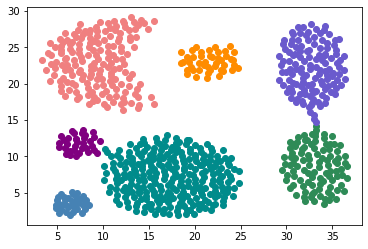

In [3]:
df = pd.read_table("cluster_data_set/Aggregation.txt", delim_whitespace=True)
print(df.describe())
labels_set = set(df.iloc[:,-1])
for i in labels_set:
    print("{:s} points: {:d}".format(COLORS[i],list(df.iloc[:,2]).count(i)))
fig0 = plt.figure("ground truth")
for i in range(len(df)):
    plt.scatter(df.iloc[i, 0], df.iloc[i, 1], color=COLORS[df.iloc[i, 2] % len(COLORS)])

In [4]:
df1 = df.iloc[:, :2]
model = OPTICS(df1)
model.optics(Eps=10000, MinPts=20)

(-5.0, 793.0)

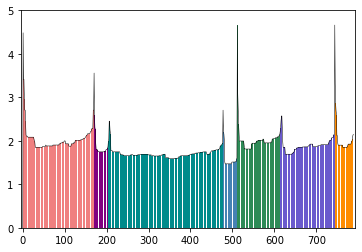

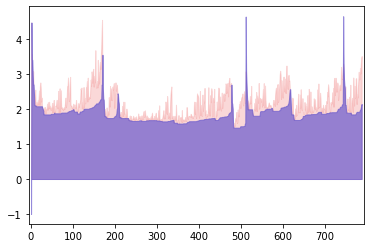

In [5]:
fig1 = plt.figure("ordered rd with ground truth label")
index = np.linspace(0, model.len, model.len)
rd = []
cd = []
labels = []
for i in range(model.len):
    rd.append(model.reachable_distances[model.result_queue[i]])
    cd.append(model.core_distances[model.result_queue[i]])
    labels.append(COLORS[df.iloc[model.result_queue[i], 2] % len(COLORS)])
plt.bar(index, rd, color=labels)
plt.plot(index,rd,color='black',linewidth=0.5)
plt.ylim(0, 5)
plt.xlim(-5, model.len+5)
fig2 = plt.figure("ordered rd and cd")
plt.fill_between(index, 0, cd, alpha=0.3, color='lightcoral')
plt.fill_between(index, 0, rd, alpha=0.7, color='slateblue')
plt.xlim(-5, model.len+5)
#plt.ylim(0, 2.5)

darkorange points: 161
lightcoral points: 35
seagreen points: 270
darkcyan points: 34
steelblue points: 102
slateblue points: 126
purple points: 41
noise points: 19


(0.0, 5.0)

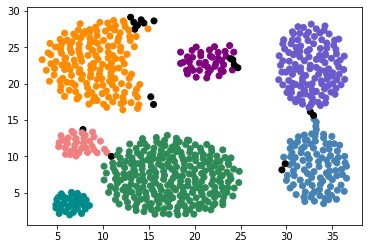

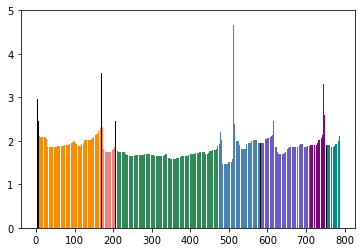

In [6]:
model.cluster_extract(2.4)
fig3 = plt.figure("clustering result")
cluster_labels = []
for i in range(model.len):
    c = model.cluster_labels[i]
    if c==-1:
        cluster_labels.append("black")
    else:
        cluster_labels.append(COLORS[c % len(COLORS)])
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], color=cluster_labels)
labels = set(model.cluster_labels)
for i in labels:
    if i !=- 1:
        print("{:s} points: {:d}".format(COLORS[i],list(model.cluster_labels).count(i)))
    else:
        print("noise points: {:d}".format(list(model.cluster_labels).count(-1)))
fig4 = plt.figure("rd with clustering colors")
plt.bar(index,rd,color=cluster_labels)
plt.ylim(0, 5)